<a href="https://colab.research.google.com/github/xinhe-zhang/heatwave/blob/main/HW4_%E5%BC%B5%E6%98%95%E8%8D%B7_R12228016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IPCS Heatwave HW4:
**Thermofeel**


**Reference:**

https://github.com/ecmwf-projects/thermofeel

Brimicombe C,Di Napoli C, Quintino T,Pappenberger F, Cornforth R and Cloke H,2022 thermofeel: a python thermal comfort indices library Software X https://doi.org/10.1016/j.softx.2022.101005


https://pypi.org/project/thermofeel/



[HW4]

Level 1: Calculate utci and repeat HW1(level 1, change temperature to utci). Compare two difference(describe)


In [37]:
!pip install pythermalcomfort
!pip install cartopy
from pythermalcomfort import models
import xarray as xr
!pip install netCDF4
import netCDF4 as nc4
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
import numpy as np
import matplotlib.dates as mdates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#Download ERA5 Tmax, 1979-2022,  144*73
#https://drive.google.com/file/d/1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn/view?usp=sharing
!gdown 1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1MAMmzwCw3BQAkeVxIyBIMaBUzge_fvkn
To: /content/ERA5_SFC_mx2t_1979-2022_r144x73_day.nc
100% 676M/676M [00:10<00:00, 65.7MB/s]


In [3]:
filename ='ERA5_SFC_mx2t_1979-2022_r144x73_day.nc'
ds_mx2t = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

In [4]:
#Write the time format
ds_mx2t['time'] = ds_mx2t['time'].astype('datetime64[ns]')
print(ds_mx2t['time'].dtype)
print(ds_mx2t['time'])

start_date = np.datetime64('1979-01-01')
end_date = np.datetime64('2023-01-01')  # Adjust the end date as needed

# Create a time array with intervals of 1 day
time_array = np.arange(start_date, end_date, np.timedelta64(1, 'D'))

print(time_array)
ds_mx2t['time'] = time_array

datetime64[ns]
<xarray.DataArray 'time' (time: 16071)>
array(['1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', ..., '1970-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01 1970-01-01 ... 1970-01-01
Attributes:
    standard_name:  time
    long_name:      Date
    units:          day as %Y%m%d.%f
    calendar:       proleptic_gregorian
    axis:           T
['1979-01-01' '1979-01-02' '1979-01-03' ... '2022-12-29' '2022-12-30'
 '2022-12-31']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

In [5]:
ds_mx2t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

<xarray.Dataset>
Dimensions:  (time: 16071, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    mx2t     (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [6]:
# Convert Kelvin to Celsius
ds_mx2t = ds_mx2t - 273.15

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen 

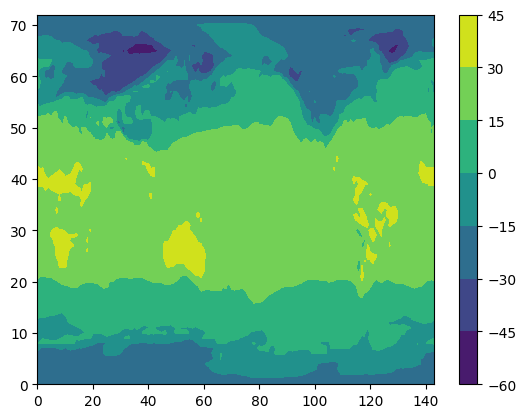

In [7]:
plt.contourf(ds_mx2t['mx2t'][0,:,:])
plt.colorbar()

In [9]:
#Select the month and location
my_mx2t = ds_mx2t.sel(time=ds_mx2t.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [10]:
my_mx2t

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lon      float64 130.0
    lat      float64 67.5
Data variables:
    mx2t     (time) float32 2.673 0.3972 1.433 2.862 ... 1.211 5.655 14.04 13.57
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...

In [12]:
#Download ERA5 RH, 1979-2022, 144*73
#https://drive.google.com/file/d/1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY/view?usp=sharing
!gdown 1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=1mn1vZ7QYLzRbeLYS7Dw8yJGtLb0O6hAY
To: /content/ERA5_SFC_rh_1979-2022_r144x73_day.nc
100% 676M/676M [00:08<00:00, 79.9MB/s]


In [13]:
filename ='ERA5_SFC_rh_1979-2022_r144x73_day.nc'
ds_rh = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#Write the time format
ds_rh['time'] = ds_rh['time'].astype('datetime64[ns]')
ds_rh['time'] = time_array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
ds_rh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 16071, lat: 73, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    rh       (time, lat, lon) float32 ...

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


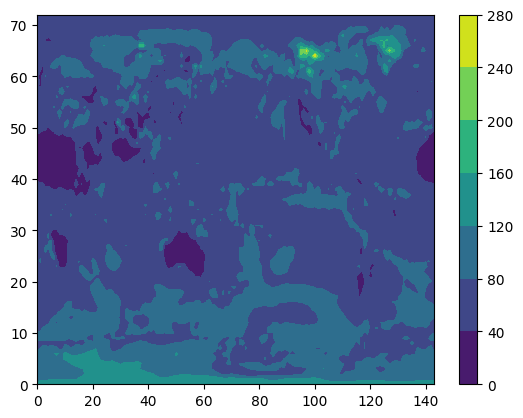

In [18]:
plt.contourf(ds_rh['rh'][0,:,:])
plt.colorbar()

In [20]:
#Select the month and location
my_rh = ds_rh.sel(time=ds_mx2t.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [21]:
my_rh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lat      float64 67.5
    lon      float64 130.0
Data variables:
    rh       (time) float32 ...

In [22]:
#Download ERA5 wspd(wind speed), 1979-2022, 144*73
#https://drive.google.com/file/d/149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2/view?usp=sharing
!gdown 149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading...
From: https://drive.google.com/uc?id=149319JDdg_OS5Sg2UiTprG-t0ZD5tfo2
To: /content/ERA5_SFC_wspd_1979-2022_r144x73_day.nc
100% 676M/676M [00:10<00:00, 62.8MB/s]


In [23]:
filename ='ERA5_SFC_wspd_1979-2022_r144x73_day.nc'
ds_wspd = xr.open_dataset(filename)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#Write the time format
ds_wspd['time'] = ds_wspd['time'].astype('datetime64[ns]')
ds_wspd['time'] = time_array

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
print(ds_wspd['wspd'])

<xarray.DataArray 'wspd' (time: 16071, lat: 73, lon: 144)>
[168938352 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-12-31
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    cell_methods:   time: mean
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind
    level:          1000.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


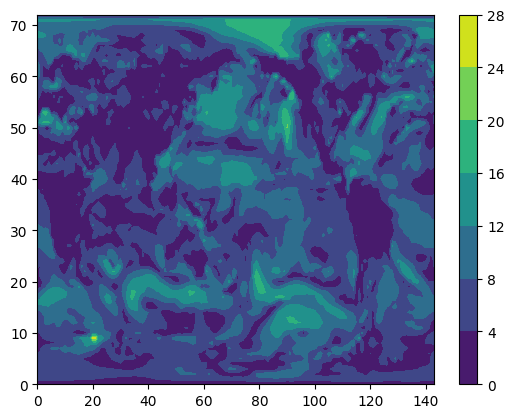

In [25]:
plt.contourf(ds_wspd['wspd'][0,:,:])
plt.colorbar()

In [28]:
#Select the month and location
my_wspd = ds_wspd.sel(time=ds_wspd.time.dt.month.isin([6])).sel(lat=67.5, lon=130, method="nearest")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)


In [29]:
print(my_wspd)

<xarray.Dataset>
Dimensions:  (time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2022-06-30
    lat      float64 67.5
    lon      float64 130.0
Data variables:
    wspd     (time) float32 ...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
def xutci(tbr, tr, v, rh):
    return xr.apply_ufunc(
        models.utci,
        tbr,
        tr,
        v,
        rh,
    )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
rh = my_rh['rh']
t = my_mx2t['mx2t']
wspd = my_wspd['wspd']
my_utci = xutci(t, t, wspd, rh)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
#filter 2020 tmax
my_mx2t_2020 = my_mx2t.sel(time=slice('2020-06-01', '2020-06-30'))
print(my_mx2t_2020)
#now we got data only in the 30 days in June, 2020

<xarray.Dataset>
Dimensions:  (time: 30)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5
Data variables:
    mx2t     (time) float32 9.526 10.94 9.943 7.004 ... 25.26 24.78 20.81 23.3
Attributes:
    CDI:          Climate Data Interface version 2.1.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    information:  Using ERA5 Reanalysis Data to calculus daily maximum
    method:       Daily Avg. Use NCL function : dim_max_n_Wrap
    productor:    Hsin-Chien Liang (LCCR/RCEC, Academia Sinica)
    contact:      lama@gate.sinica.edu.tw
    history:      Sat Jul 15 17:29:31 2023: cdo mergetime ERA5_SFC_mx2t_1979_...
    CDO:          Climate Data Operators version 2.1.1 (https://mpimet.mpg.de...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
my_mx2t_2020['mx2t']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<xarray.DataArray 'mx2t' (time: 30)>
array([ 9.525879 , 10.940521 ,  9.943268 ,  7.0035706, 12.126099 ,
       16.367584 , 18.905792 , 19.417328 , 14.270233 ,  3.7114868,
       11.85788  , 14.485016 , 15.052765 , 19.041107 , 16.863617 ,
       18.66867  , 20.802094 , 22.38266  , 24.947235 , 27.151031 ,
       28.141815 , 25.965271 , 26.225433 , 26.054504 , 25.74002  ,
       24.923676 , 25.255829 , 24.777466 , 20.811737 , 23.30014  ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5

In [32]:
#filter 2020 June utci
my_utci_2020 = my_utci.sel(time=slice('2020-06-01', '2020-06-30'))
print(my_utci_2020)
#now we got data only in the 30 days in June, 2020

<xarray.DataArray (time: 30)>
array([ 8.4, 10.7,  7.7,  5.8, 11.4, 15.9, 17.7, 18.4,  8.7,  3. ,  9.4,
       11.6, 13.4, 16.1, 11.8, 13.6, 18.7, 21.5, 23.5, 26.1, 26.6, 24.8,
       25.5,  nan, 24.8, 24.5, 24.6, 23.8, 18.9, 22. ])
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
my_utci_2020.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30,)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


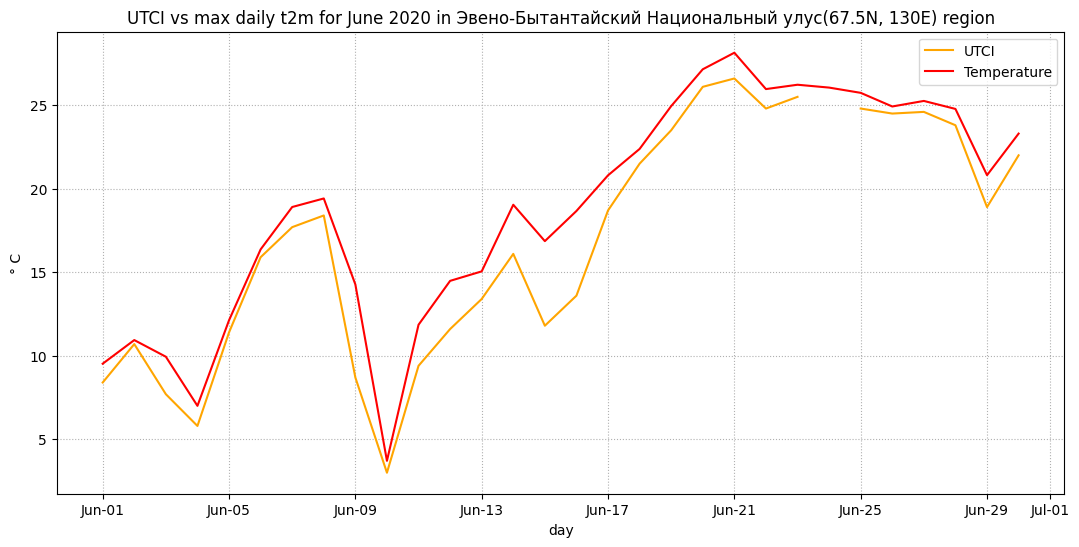

In [64]:
#a line plot that shows utci fluctuation in June, 2002
fig, ax = plt.subplots(1, 1, figsize = (13, 6))
ax.plot(my_utci_2020.time, my_utci_2020, color = "orange", label='UTCI')
ax.plot(my_mx2t_2020.time, my_mx2t_2020['mx2t'], color = "red", label='Temperature')
ax.set_title('UTCI vs max daily t2m for June 2020 in Эвено-Бытантайский Национальный улус(67.5N, 130E) region')
ax.set_ylabel('° C')
ax.set_xlabel('day')
ax.grid(linestyle='dotted')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

**Fig.1**
*This plot shows the variation of UTCI (there is one NA value on 24th June) and maximum temperature at 2m in June 2020 at the location (67.5N, 130E).The trends are similar for the two variables. However, in this case, the UTCI is slightly lower than the air temperature.*

In [66]:
#select mx2t before 2020(included)
mx2t_past = my_mx2t['mx2t'].loc['1979':'2020']
print(mx2t_past)

<xarray.DataArray 'mx2t' (time: 1260)>
array([ 2.6732178 ,  0.39715576,  1.433136  , ..., 24.777466  ,
       20.811737  , 23.30014   ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
#select 10, 50, 90 quantile from the past
mx2t_max_mid = mx2t_past.groupby('time.day').quantile(0.5)
mx2t_max_90  = mx2t_past.groupby('time.day').quantile(0.9)
mx2t_max_10  = mx2t_past.groupby('time.day').quantile(0.1)
print(mx2t_max_10)
print(mx2t_max_mid)
print(mx2t_max_90)

<xarray.DataArray 'mx2t' (day: 30)>
array([ 1.26698303, -0.09563599,  1.47315979,  2.10023804,  2.53217163,
        1.55690002,  2.51426392,  2.14571838,  2.75400391,  4.51462708,
        4.51018677,  2.24583435,  5.57673035,  5.69622192,  3.90957642,
        6.54688721,  7.68616638,  6.05609741,  5.04045715,  5.16160889,
        4.40421448,  3.99577026,  4.86681213,  6.4004425 ,  7.26490784,
        7.31978455,  8.03847961,  9.05471497,  7.40127869,  9.04939575])
Coordinates:
    quantile  float64 0.1
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray 'mx2t' (day: 30)>
array([ 7.7645874 ,  7.79483032,  9.07383728,  7.9112854 ,  8.03172302,
        9.98014832,  9.47103882, 10.50602722, 11.3681488 , 11.00364685,
       11.26649475, 13.46394348, 13.24005127, 12.95986938, 12.92799377,
       13.46987915, 14.81951904, 14.9394989 , 14.83474731, 13.76452637,
       14.03843689, 12.8120575 , 12.37139893, 14.28312683, 13.42919922,
       13.80627

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
#select UTCI before 2020(included)
utci_past = my_utci.loc['1979':'2020']
print(utci_past)

<xarray.DataArray (time: 1260)>
array([-0.2, -3. ,  0.1, ..., 23.8, 18.9, 22. ])
Coordinates:
  * time     (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2020-06-30
    lon      float64 130.0
    lat      float64 67.5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
#select 10, 50, 90 quantile from the past
utci_max_mid = utci_past.groupby('time.day').quantile(0.5)
utci_max_90  = utci_past.groupby('time.day').quantile(0.9)
utci_max_10  = utci_past.groupby('time.day').quantile(0.1)
print(utci_max_10)
print(utci_max_mid)
print(utci_max_90)

<xarray.DataArray (day: 30)>
array([-4.3 , -5.7 , -0.41, -2.24, -4.9 , -1.72, -1.9 , -1.39, -0.22,
        2.6 ,  1.2 , -2.62,  3.39,  2.25, -2.14,  2.73,  4.24,  0.57,
        1.37, -1.38, -1.36, -2.1 ,  0.5 ,  3.68,  0.8 ,  2.1 ,  4.77,
        6.16,  2.89,  5.1 ])
Coordinates:
    quantile  float64 0.1
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray (day: 30)>
array([ 5.9 ,  4.8 ,  5.7 ,  4.2 ,  7.  ,  7.55,  7.8 ,  8.1 ,  8.5 ,
       10.  ,  8.7 ,  9.4 , 11.3 , 10.55, 10.35,  9.7 , 11.5 , 12.35,
       12.25, 10.6 , 11.25,  9.8 , 11.5 , 10.7 , 12.6 , 11.9 , 13.3 ,
       14.1 , 13.1 , 13.3 ])
Coordinates:
    quantile  float64 0.5
  * day       (day) int64 1 2 3 4 5 6 7 8 9 10 ... 21 22 23 24 25 26 27 28 29 30
<xarray.DataArray (day: 30)>
array([ 9.  , 13.3 , 12.83, 12.1 , 15.9 , 16.25, 16.6 , 17.  , 16.25,
       15.6 , 15.9 , 17.04, 16.43, 17.12, 18.24, 18.76, 18.9 , 18.83,
       20.14, 19.92, 18.95, 20.3 , 22.2 , 20.06, 21.5 ,

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  values_as_series = pd.Series(values.ravel(), copy=False)
/usr/local/lib/python3.10/dist-packages/xarray/core/accessor_dt.py:72: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this wil

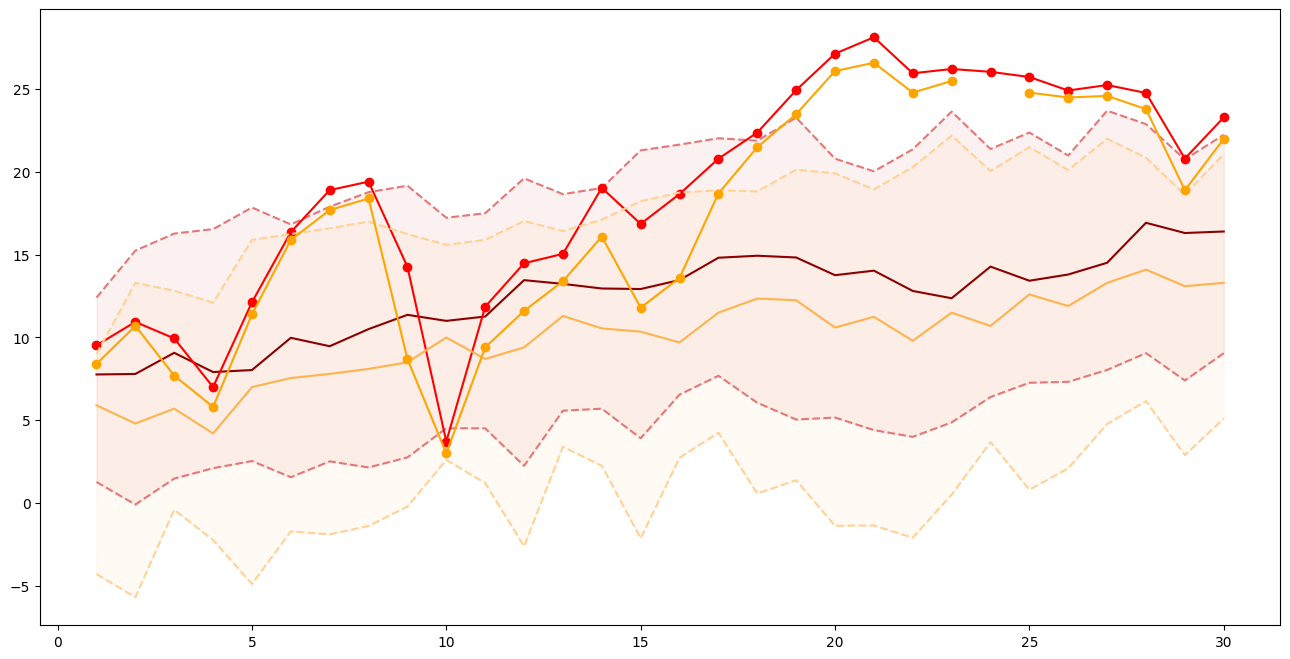

In [98]:
fig = plt.figure(figsize=(16,8))
ax = plt.subplot()

ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_mid, color='darkred', label='Daily max t2m 50th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_90, color='#E37878', ls='--', label='Daily max t2m 90th quantile')
ax.plot(my_mx2t_2020.time.dt.day, mx2t_max_10, color='#E37878', ls='--', label='Daily max t2m 10th quantile')
ax.plot(my_mx2t_2020.time.dt.day, my_mx2t_2020['mx2t'], 'bo-', color='red', label='Daily max t2m June 2020')
ax.fill_between(my_mx2t_2020.time.dt.day, mx2t_max_90, mx2t_max_10, alpha=0.1,
                label='90% and 10% values of max t2m from 1979 to 2020', color = '#E37878')

ax.plot(my_utci_2020.time.dt.day, utci_max_mid, color='#FFB34D', label='Daily max t2m 50th quantile')
ax.plot(my_utci_2020.time.dt.day, utci_max_90, color='#FFD296', ls='--', label='Daily max t2m 90th quantile')
ax.plot(my_utci_2020.time.dt.day, utci_max_10, color='#FFD296', ls='--', label='Daily max t2m 10th quantile')
ax.plot(my_utci_2020.time.dt.day, my_utci_2020, 'bo-', color='orange', label='Daily UTCI June 2020')
ax.fill_between(my_utci_2020.time.dt.day, utci_max_90, utci_max_10, alpha=0.1,
                label='90% and 10% values of UTCI from 1979 to 2020', color = '#FFD296')

#ax.set_xlim(1,30)
#ax.set_ylim(-5,30)
#ax.set_title('Daily max t2m for June 2020 compared with climatology for June from 1979 to 2020')
#ax.set_ylabel('t2m (Celsius)')
#ax.set_xlabel('day')
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles, labels)
#ax.grid(linestyle='dotted')